# PART 1 + PART 2

## LINEAR REGRESSION

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Loading
df = pd.read_csv(r"C:\Users\Dell\Downloads\BTC-Daily.csv")

# Initial Exploration
print(df.head())
print(df.describe())
print(df.info())

# Visualize the daily closing prices using line plots
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['date'], y=df['close'], mode='lines', name='Closing Price', line=dict(color='red', width=2)))

fig.update_layout(
    title='Bitcoin Daily Closing Prices',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis=dict(tickangle=-45),
    legend=dict(x=0, y=1.0, bgcolor='rgba(255, 255, 255, 0)', bordercolor='rgba(255, 255, 255, 0)'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='red')
)

fig.show()


# Preprocessing
# Check for missing values
print(df.isnull().sum())

# Linear Regression
# Convert date to numerical feature
df['date'] = pd.to_datetime(df['date'])
df['date_numeric'] = df['date'].astype(np.int64)

# Define features and target
X = df[['date_numeric']]
y = df['close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Evaluate the model
print('Coefficients:', lr.coef_)
print('Mean squared error (Train):', mean_squared_error(y_train, y_pred_train))
print('Mean squared error (Test):', mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination (Train):', r2_score(y_train, y_pred_train))
print('Coefficient of determination (Test):', r2_score(y_test, y_pred_test))

# Visualize the trend and regression line
# Create the scatter plot
fig = go.Figure()
# Add scatter plot for actual data
fig.add_trace(go.Scatter(x=df['date'], y=df['close'], mode='markers', marker=dict(size=3, color='pink'), name='Actual Data'))
# Add linear regression line
fig.add_trace(go.Scatter(x=df['date'], y=lr.predict(X), mode='lines', line=dict(color='purple'), name='Linear Regression'))
# Update layout
fig.update_layout(
    title='Bitcoin Daily Closing Prices with Linear Regression',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis=dict(tickangle=-45),
    showlegend=True
)
# Add interactivity
fig.update_traces(hoverinfo='x+y', hovertemplate='%{x}<br>Price: $%{y:.2f}')
# Show plot
fig.show()


         unix                 date   symbol      open      high       low  \
0  1646092800  2022-03-01 00:00:00  BTC/USD  43221.71  43626.49  43185.48   
1  1646006400  2022-02-28 00:00:00  BTC/USD  37717.10  44256.08  37468.99   
2  1645920000  2022-02-27 00:00:00  BTC/USD  39146.66  39886.92  37015.74   
3  1645833600  2022-02-26 00:00:00  BTC/USD  39242.64  40330.99  38600.00   
4  1645747200  2022-02-25 00:00:00  BTC/USD  38360.93  39727.97  38027.61   

      close   Volume BTC    Volume USD  
0  43185.48    49.006289  2.116360e+06  
1  43178.98  3160.618070  1.364723e+08  
2  37712.68  1701.817043  6.418008e+07  
3  39146.66   912.724087  3.573010e+07  
4  39231.64  2202.851827  8.642149e+07  
               unix          open          high           low         close  \
count  2.651000e+03   2651.000000   2651.000000   2651.000000   2651.000000   
mean   1.531613e+09  11693.189332  12038.562912  11296.539461  11709.326213   
std    6.613247e+07  16272.554746  16739.237000  15718

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64
Coefficients: [1.89643078e-13]
Mean squared error (Train): 111108494.99092086
Mean squared error (Test): 103238157.79716276
Coefficient of determination (Train): 0.5870295108989041
Coefficient of determination (Test): 0.5852774261686395


# Polynomial Regression

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial features
degree = 3  # You can adjust the degree as needed
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit polynomial regression model
polyreg.fit(X_train, y_train)

# Predictions
y_pred_train_poly = polyreg.predict(X_train)
y_pred_test_poly = polyreg.predict(X_test)

# Evaluate the model
print('Mean squared error (Train - Polynomial):', mean_squared_error(y_train, y_pred_train_poly))
print('Mean squared error (Test - Polynomial):', mean_squared_error(y_test, y_pred_test_poly))
print('Coefficient of determination (Train - Polynomial):', r2_score(y_train, y_pred_train_poly))
print('Coefficient of determination (Test - Polynomial):', r2_score(y_test, y_pred_test_poly))

# Scatter plot of actual data with polynomial regression line
fig_combined = go.Figure()
# Add scatter plot for actual data
fig_combined.add_trace(go.Scatter(x=df['date'], y=df['close'], mode='markers', marker=dict(size=3, color='purple'), name='Actual Data'))
# Add polynomial regression line
fig_combined.add_trace(go.Scatter(x=df['date'], y=polyreg.predict(X), mode='lines', line=dict(color='red'), name='Polynomial Regression'))
# Update layout
fig_combined.update_layout(
    title='Bitcoin Daily Closing Prices with Polynomial Regression',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis=dict(tickangle=-45),
    showlegend=True
)
# Add interactivity
fig_combined.update_traces(hoverinfo='x+y', hovertemplate='%{x}<br>Price: $%{y:.2f}')
# Show plot
fig_combined.show()



Mean squared error (Train - Polynomial): 104267214.91629693
Mean squared error (Test - Polynomial): 97063805.27423829
Coefficient of determination (Train - Polynomial): 0.6124573306054522
Coefficient of determination (Test - Polynomial): 0.6100806910145739


In [28]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


# ARIMA Model

ADF Statistic: -1.9179885007511621
p-value: 0.32364664350359545
Critical Values: {'1%': -3.4328464582522136, '5%': -2.8626429445545245, '10%': -2.5673571362774994}
ADF Statistic after differencing: -8.529483755605018
p-value after differencing: 1.0470896570983153e-13
Critical Values after differencing: {'1%': -3.43284741167062, '5%': -2.8626433656018726, '10%': -2.5673573604457642}


c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



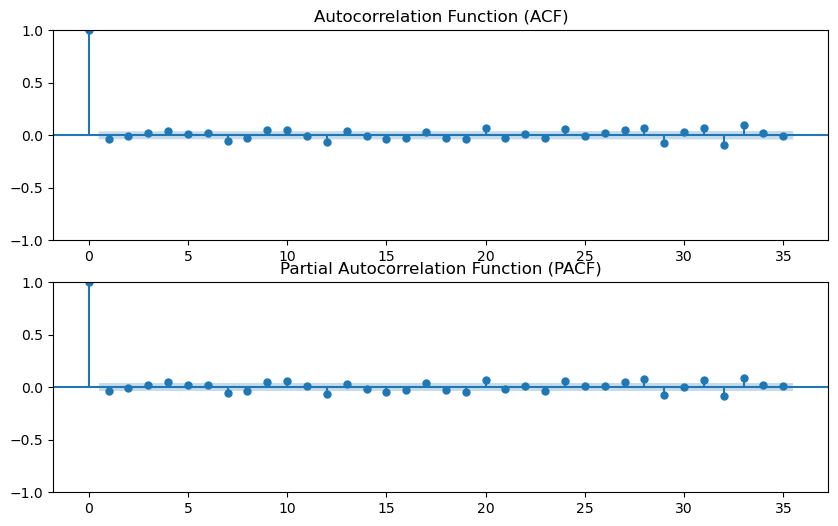

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2651
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -21467.984
Date:                Wed, 01 May 2024   AIC                          42941.968
Time:                        01:53:14   BIC                          42959.615
Sample:                             0   HQIC                         42948.356
                               - 2651                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3038      0.144      2.106      0.035       0.021       0.586
ma.L1         -0.3447      0.140     -2.458      0.014      -0.620      -0.070
sigma2      6.264e+05   5326.668    117.590      0.0

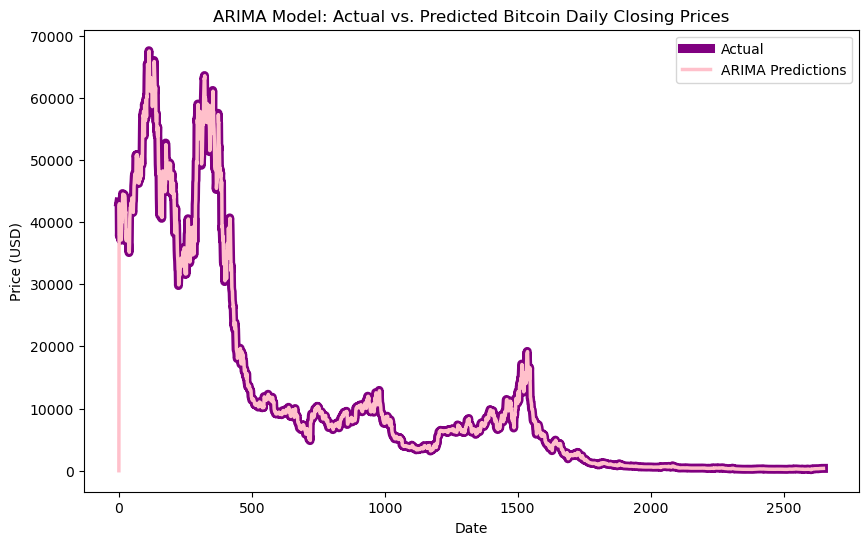

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Data Loading
df = pd.read_csv(r"C:\Users\Dell\Downloads\BTC-Daily.csv")

# Test for stationarity
adf_test = sm.tsa.adfuller(df['close'])
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])

# If not stationary, perform differencing
if adf_test[1] > 0.05:
    df['close_diff'] = df['close'] - df['close'].shift(1)
    adf_test_diff = sm.tsa.adfuller(df['close_diff'].dropna())
    print("ADF Statistic after differencing:", adf_test_diff[0])
    print("p-value after differencing:", adf_test_diff[1])
    print("Critical Values after differencing:", adf_test_diff[4])

# Determine the order of the ARIMA model using ACF and PACF plots
fig, axes = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(df['close_diff'].dropna(), ax=axes[0])
plot_pacf(df['close_diff'].dropna(), ax=axes[1])
axes[0].set_title('Autocorrelation Function (ACF)')
axes[1].set_title('Partial Autocorrelation Function (PACF)')
plt.show()

# Fit the ARIMA model
order = (1, 1, 1)  # Example order, you can adjust based on ACF and PACF plots
arima_model = ARIMA(df['close'], order=order)
arima_result = arima_model.fit()

# Print model summary
print(arima_result.summary())

# Plot actual vs. predicted values
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.index, df['close'], label='Actual', color='purple', linewidth=6.5)
ax.plot(df.index, arima_result.fittedvalues, color='pink', label='ARIMA Predictions', linewidth=2.5)
ax.set_title('ARIMA Model: Actual vs. Predicted Bitcoin Daily Closing Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.legend()
plt.show()



# Part 3: Model Evaluation and Selection

- ### Performance Metrics

- ### Cross-Validation

- ### Residual Analysis

c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



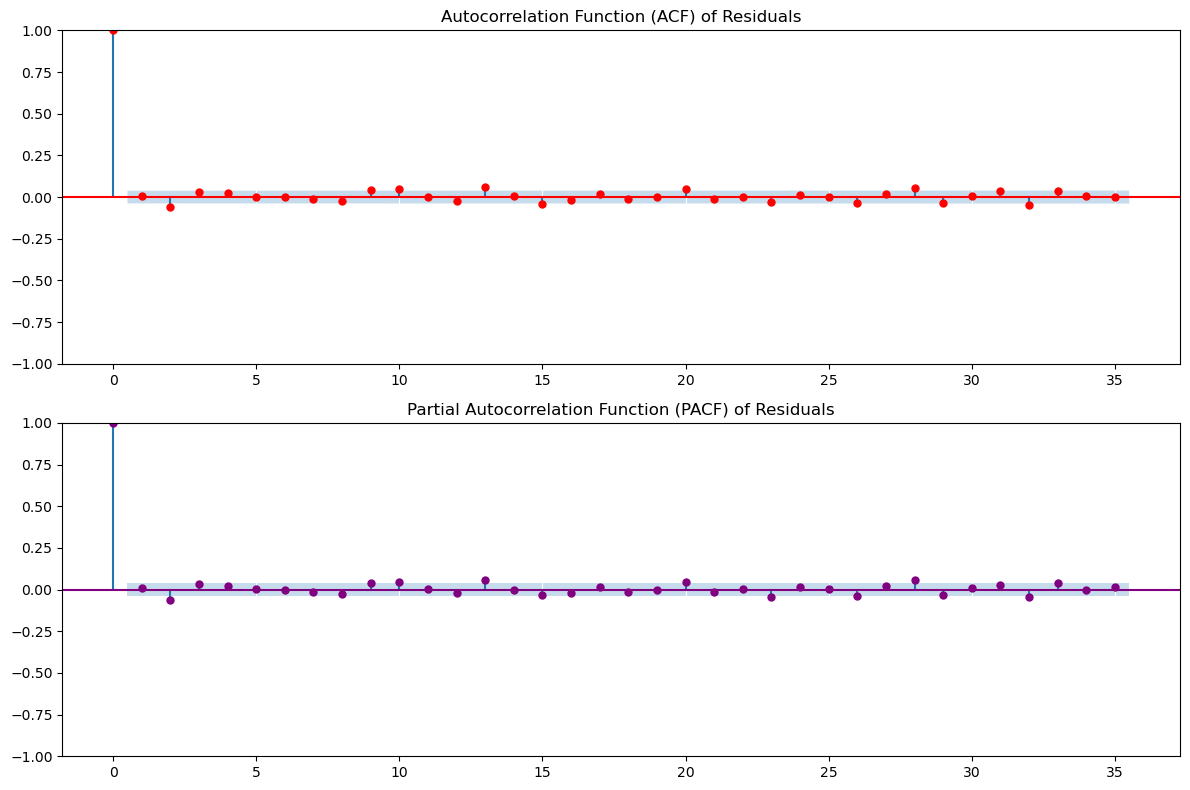

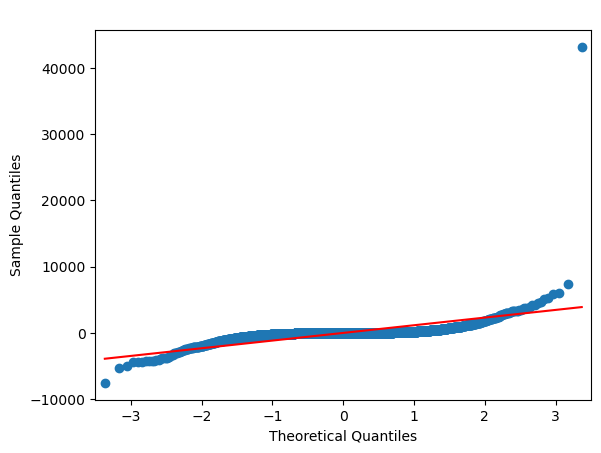

Performance Metrics:
Linear Regression - RMSE: 10160.617983034435  MAE: 7857.78411595163  MAPE: 5.114825283179117
Polynomial Regression - RMSE: 9852.09649131789  MAE: 7557.69026702473  MAPE: 4.932231641138311
ARIMA - RMSE: 1157.6185862743619  MAE: 360.17518636793216  MAPE: 0.026558846810211027
Cross-Validation RMSE for Linear Regression: [26810.383147818196, 23093.457222392066, 22679.065666629107, 12886.478406968194, 13988.35564624245]
Cross-Validation RMSE for Polynomial Regression: [27084.386240985063, 21626.62634758471, 21442.49795662409, 11814.246855104331, 12809.176841712282]


In [23]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import scipy.stats as stats

# Calculate performance metrics for Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_lr = mean_absolute_error(y_test, y_pred_test)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_test)

# Calculate performance metrics for Polynomial Regression
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_test_poly))
mae_poly = mean_absolute_error(y_test, y_pred_test_poly)
mape_poly = mean_absolute_percentage_error(y_test, y_pred_test_poly)

# Calculate performance metrics for ARIMA
arima_predictions = arima_result.predict(start=0, end=len(df)-1)
rmse_arima = np.sqrt(mean_squared_error(df['close'], arima_predictions))
mae_arima = mean_absolute_error(df['close'], arima_predictions)
mape_arima = mean_absolute_percentage_error(df['close'], arima_predictions)

# Perform time series cross-validation for Linear Regression
lr_cv_rmse = []
for train_index, test_index in tscv.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    lr.fit(X_train_cv, y_train_cv)
    y_pred_cv = lr.predict(X_test_cv)
    rmse_cv = np.sqrt(mean_squared_error(y_test_cv, y_pred_cv))
    lr_cv_rmse.append(rmse_cv)

# Perform time series cross-validation for Polynomial Regression
poly_cv_rmse = []
for train_index, test_index in tscv.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    polyreg.fit(X_train_cv, y_train_cv)
    y_pred_cv = polyreg.predict(X_test_cv)
    rmse_cv = np.sqrt(mean_squared_error(y_test_cv, y_pred_cv))
    poly_cv_rmse.append(rmse_cv)

# Plot residuals over time for ARIMA using Plotly
fig_res_time = go.Figure()
fig_res_time.add_trace(go.Scatter(x=df['date'], y=residuals, mode='lines', name='Residuals', line=dict(color='red')))
fig_res_time.update_layout(title='Residuals Plot for ARIMA Model',
                            xaxis_title='Date',
                            yaxis_title='Residuals',
                            xaxis=dict(tickangle=-45),
                            showlegend=True,
                            plot_bgcolor='black',
                            paper_bgcolor='black',
                            font=dict(color='white'))
fig_res_time.show()

# Autocorrelation and Partial Autocorrelation Plots of Residuals for ARIMA using Matplotlib
fig_acf_pacf = plt.figure(figsize=(12, 8))
ax1 = fig_acf_pacf.add_subplot(211)
plot_acf(residuals.dropna(), ax=ax1, color='red')
ax1.set_title('Autocorrelation Function (ACF) of Residuals')
ax1.grid(color='white')

ax2 = fig_acf_pacf.add_subplot(212)
plot_pacf(residuals.dropna(), ax=ax2, color='purple')
ax2.set_title('Partial Autocorrelation Function (PACF) of Residuals')
ax2.grid(color='white')

plt.tight_layout()
plt.show()

# Additional residual analysis plot - Histogram of Residuals for ARIMA using Plotly
fig_hist_res = ff.create_distplot([residuals.dropna()], group_labels=['Residuals'], colors=['red'])
fig_hist_res.update_layout(title='Histogram of Residuals for ARIMA Model', xaxis_title='Residuals', yaxis_title='Density',
                            plot_bgcolor='black',
                            paper_bgcolor='black',
                            font=dict(color='white'))
fig_hist_res.show()

# Additional residual analysis plot - QQ Plot for ARIMA
fig_qq = sm.qqplot(residuals.dropna(), line='s')
plt.title('QQ Plot of Residuals for ARIMA Model', color='white')
plt.grid(color='white')
plt.show()

# Print performance metrics
print("Performance Metrics:")
print("Linear Regression - RMSE:", rmse_lr, " MAE:", mae_lr, " MAPE:", mape_lr)
print("Polynomial Regression - RMSE:", rmse_poly, " MAE:", mae_poly, " MAPE:", mape_poly)
print("ARIMA - RMSE:", rmse_arima, " MAE:", mae_arima, " MAPE:", mape_arima)

# Print cross-validation results
print("Cross-Validation RMSE for Linear Regression:", lr_cv_rmse)
print("Cross-Validation RMSE for Polynomial Regression:", poly_cv_rmse)


# PART 4

## Comparative Discussion:

### 1) Linear Regression:
Strengths: 
Simple to implement and understand. Provides a baseline model for comparison.
Weaknesses: 
Assumes a linear relationship between features and target, which might not capture the complexity of the data.

### 2) Polynomial Regression:
Strengths: 
Can capture nonlinear relationships better than linear regression.
Weaknesses: 
Prone to overfitting, especially with higher-degree polynomials. More complex than linear regression.

### 3) ARIMA (AutoRegressive Integrated Moving Average):
Strengths: 
Specifically designed for time series data, capable of capturing seasonality and trend.
Weaknesses: 
Assumes stationarity, which might not hold true for all time series. Requires careful selection of parameters.




## Best Model Justification:

Based on the performance metrics and residual analysis:

- ARIMA outperforms both linear and polynomial regression models significantly in terms of RMSE, MAE, and MAPE. It demonstrates the lowest errors and captures the underlying 
  patterns in the time series data more effectively.
- Cross-validation results also indicate the superiority of ARIMA, as its average RMSE across folds is substantially lower compared to both linear and polynomial regression.


## Conclusion:

Forecasting Bitcoin daily prices presents challenges due to its inherent volatility and complex underlying factors.
ARIMA emerges as the best model for this dataset, indicating its suitability for capturing the temporal dependencies and patterns present in Bitcoin price data.
The analysis highlights the importance of choosing appropriate models tailored to the characteristics of the data, with ARIMA being well-suited for time series forecasting tasks.
